# Simulation

In [1]:
# Import required functions and libraries

import math
import random
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from scipy.stats import expon
from matplotlib.pyplot import figure
from distfit import distfit

First, we define the game.

In [2]:
def game(a=4, b=4, coins=10):
    
    # This function accepts a starting number of coins for both
    # players A and B, and the total number of coins in the game.
    # It returns the number of cycles played until one 
    # of the players can't submit a coin to the pot.
 
    pot = coins - a - b               # Calculate the number of coins in the pot
    cycles = 0                        # Initialize the cycle coint to 0
    max_cycles = 1000                 # Set a maximum number of iterations 
    
    while cycles <= max_cycles: 
        
        cycles += 1                   # Count 1 cycle for both players' turns
        
        ############################################################################
        # A's turn
        
        a_roll = random.randint(1,6)  # Simulate player A's die roll
        
        if a_roll == 1: pass          # If player A rolls a 1, do nothing

        elif a_roll == 2:             # If player A rolls a 2,
            a += pot                      # player A gets all the coins in the pot,
            pot = 0                       # and the pot goes to 0

        elif a_roll == 3:             # If player A rolls a 3,
            a += pot // 2                 # player A gets half the coins in the pot,
            pot -= pot // 2               # and the pot loses half its coins

        else:                         # If player A rolls a 4, 5, or 6 
            if a == 0:                    # and player A doesn't have any coins,
                return cycles                 # end the game
            else:                         # If player A has at least 1 coin,
                a -= 1                        # player A gives one coin to the pot,
                pot += 1                      # and the pot gains 1 coin
                
        ############################################################################
        # B's turn

        b_roll = random.randint(1,6)  # Simulate player B's die roll
        
        if b_roll == 1: pass          # If player B rolls a 1, do nothing

        elif b_roll == 2:             # If player B rolls a 2,
            b += pot                      # player B gets all the coins in the pot,
            pot = 0                       # and the pot goes to 0

        elif b_roll == 3:             # If player B rolls a 3,
            b += pot // 2                 # player B gets half the coins in the pot,
            pot -= pot // 2               # and the pot loses half its coins

        else:                         # If player B rolls a 4, 5, or 6 
            if b == 0:                    # and player B doesn't have any coins,
                return cycles                 # end the game
            else:                         # If player B has at least 1 coin,
                b -= 1                        # player B gives one coin to the pot,
                pot += 1                      # and the pot gains 1 coin
                
    return cycles

Then we simulate 1 million games and store the results in C.

In [3]:
X = []
for i in range(1000000):
    X.append(game())

We find the sample mean:

In [4]:
sample_mean = sum(X) / len(X)
print(sample_mean)

17.539549


We plot a histogram of the empirical data using 50 bins.

(array([6.69010582e-02, 5.27727513e-02, 3.89947090e-02, 2.84804233e-02,
        1.62502646e-02, 1.65121693e-02, 1.20544974e-02, 8.85343915e-03,
        6.39285714e-03, 3.60079365e-03, 3.70873016e-03, 2.70000000e-03,
        1.97301587e-03, 1.12698413e-03, 1.13253968e-03, 8.49470899e-04,
        6.19841270e-04, 4.35185185e-04, 2.48677249e-04, 2.51322751e-04,
        1.81746032e-04, 1.41269841e-04, 7.69841270e-05, 8.83597884e-05,
        5.23809524e-05, 3.75661376e-05, 2.85714286e-05, 1.79894180e-05,
        1.95767196e-05, 1.21693122e-05, 8.99470899e-06, 5.29100529e-06,
        6.08465608e-06, 3.70370370e-06, 2.11640212e-06, 2.64550265e-06,
        1.05820106e-06, 7.93650794e-07, 1.05820106e-06, 7.93650794e-07,
        7.93650794e-07, 2.64550265e-07, 0.00000000e+00, 5.29100529e-07,
        0.00000000e+00, 2.64550265e-07, 0.00000000e+00, 2.64550265e-07,
        0.00000000e+00, 2.64550265e-07]),
 array([  5.  ,   8.78,  12.56,  16.34,  20.12,  23.9 ,  27.68,  31.46,
         35.24,  39.02

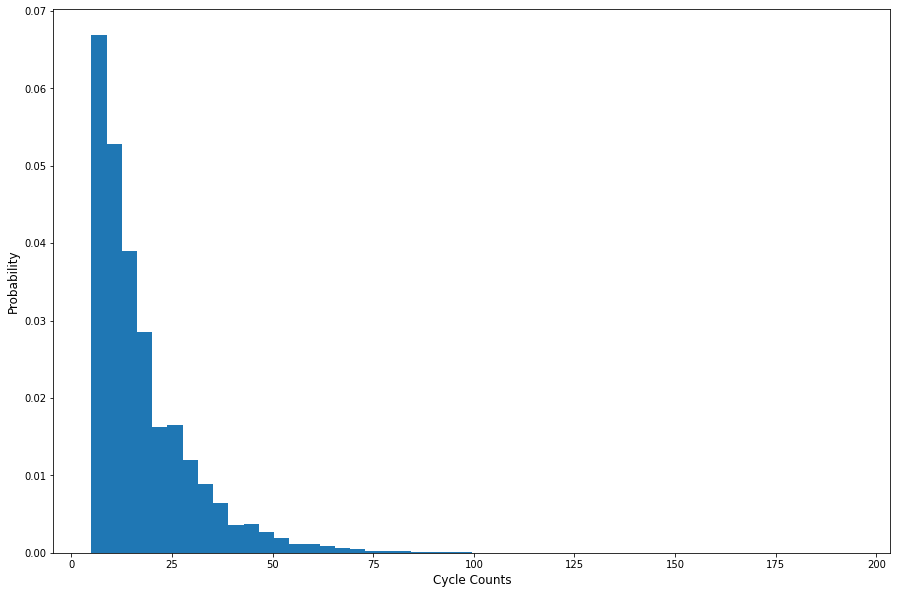

In [5]:
figure(figsize=(15,10))

plt.xlabel('Cycle Counts', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.hist(X, bins=50, density=True) #density=True outputs an empirical prob distribution

# Option to save the output as an image
#plt.savefig('hist_empirical.png')

In [6]:
#Convert the list to a NumPy array
X = np.array(X)

Now we use distfit to perform parametric probability density estimation.

In [7]:
# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(X)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0031221] [loc=17.540 scale=12.759]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000320] [loc=5.000 scale=12.540]
[distfit] >[pareto    ] [9.95 sec] [RSS: 0.0019368] [loc=-0.013 scale=5.013]
[distfit] >[dweibull  ] [5.22 sec] [RSS: 0.0021274] [loc=14.416 scale=9.133]
[distfit] >[t         ] [10.2 sec] [RSS: 0.0019320] [loc=14.021 scale=7.587]
[distfit] >[genextreme] [26.0 sec] [RSS: 0.0001743] [loc=10.654 scale=5.999]
[distfit] >[gamma     ] [13.7 sec] [RSS: 0.0002060] [loc=5.000 scale=13.257]
[distfit] >[lognorm   ] [20.7 sec] [RSS: 0.0000773] [loc=3.668 scale=9.254]
[distfit] >[beta      ] [23.8 sec] [RSS: 0.0005468] [loc=5.000 scale=1264.030]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0090359] [loc=5.000 scale=189.000]
[distfit] >[loggamma  ] [11.0 sec] [RSS: 0.0032152] [loc=-4264.795 scale=569.569]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.expon_gen at 0x7fb916406b80>,
  'stats': 'RSS',
  'params': (5.0, 12.539549000000001),
  'name': 'expon',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fb9171348e0>,
  'score': 3.195210754656238e-05,
  'loc': 5.0,
  'scale': 12.539549000000001,
  'arg': (),
  'CII_min_alpha': 5.643194778344115,
  'CII_max_alpha': 42.56513163511166},
 'summary':          distr        score  LLE       loc    scale  \
 0        expon  3.19521e-05  NaN         5  12.5395   
 1      lognorm  7.73159e-05  NaN   3.66819  9.25409   
 2   genextreme  0.000174301  NaN   10.6535   5.9991   
 3        gamma  0.000205954  NaN         5  13.2569   
 4         beta   0.00054675  NaN         5  1264.03   
 5            t   0.00193198  NaN   14.0212  7.58693   
 6       pareto    0.0019368  NaN -0.012759  5.01276   
 7     dweibull   0.00212736  NaN   14.4156  9.13271   
 8         norm   0.00312206  NaN   17.5395  12.7587   
 9     loggamma   0.003215

We print the summary of the distribution fitting:

In [8]:
dist.summary

# Option to save the output as an image
#dfi.export(dist.summary,"distfit_summary.png")

,distr,score,LLE,loc,scale,arg
0,expon,3.19521e-05,NaN,5,12.5395,()
1,lognorm,7.73159e-05,NaN,3.66819,9.25409,"(0.9501000411385825,)"
2,genextreme,0.000174301,NaN,10.6535,5.9991,"(-0.45900100685116857,)"
3,gamma,0.000205954,NaN,5,13.2569,"(0.8479523237848223,)"
4,beta,0.00054675,NaN,5,1264.03,"(0.8847812066038294, 117.40224502138686)"
5,t,0.00193198,NaN,14.0212,7.58693,"(2.6540691928796245,)"
6,pareto,0.0019368,NaN,-0.012759,5.01276,"(0.9631676761627705,)"
7,dweibull,0.00212736,NaN,14.4156,9.13271,"(1.0659180424922519,)"
8,norm,0.00312206,NaN,17.5395,12.7587,()
9,loggamma,0.00321516,NaN,-4264.79,569.569,"(1842.517202542549,)"


We plot the estimated pdf against the empirical distribution.

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nloc=5.00, scale=12.54'}, xlabel='Values', ylabel='Frequency'>)

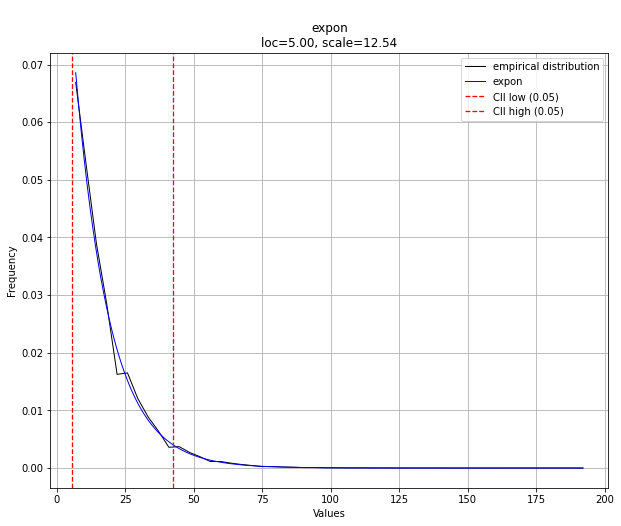

In [9]:
dist.plot()

Now we create a histogram using the estimated pdf for comparison.

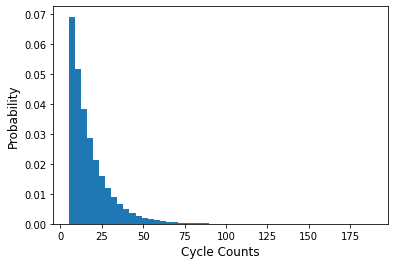

In [10]:
#Create 1M variates following the Exp(5, 12.54) distribution
variates = expon.rvs(loc=5, scale=12.54, size=1000000, random_state=123)

plt.xlabel('Cycle Counts', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.hist(variates, bins=50, density=True)

# Option to save the output as an image
plt.savefig('hist_variates.png')